In [ ]:
install.packages('readxl')
install.packages("ISLR")
install.packages("boot")
library(readxl)
library(ISLR)
library(boot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## Set Seed
set.seed(1)
## Set Data Frame
df <- read_excel("/content/sample_data/real_estate.xlsx")
data = df
## Create an index randomly sampling hald of the records from Real_Estate
train <- sample(414, 207)
head(train)

[1] 324 167 129 299 270 187

In [ ]:
df
# I renamed the variables 

No,X1td,X2ha,X3dttnms,X4nocs,X5lat,X6long,Yhpoua
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1
7,2012.667,34.5,623.47310,7,24.97933,121.5364,40.3
8,2013.417,20.3,287.60250,6,24.98042,121.5423,46.7
9,2013.500,31.7,5512.03800,1,24.95095,121.4846,18.8


In [ ]:
attach(df)
colnames(df)

The following object is masked from df (pos = 3):

    No


The following object is masked from df (pos = 4):

    No




[1] "No"       "X1td"     "X2ha"     "X3dttnms" "X4nocs"   "X5lat"    "X6long"  
[8] "Yhpoua"

In [ ]:
lm.fit <- lm(Yhpoua~X1td, data = df, subset = train)
lm.fit
# linear model fitting


Call:
lm(formula = Yhpoua ~ X1td, data = df, subset = train)

Coefficients:
(Intercept)         X1td  
  -7232.660        3.612  


In [ ]:
mean((Yhpoua - predict(lm.fit,df))[-train]^2)
# residual error

[1] 153.8845

## Quadratic function

In [ ]:
lm.fit.poly <-lm(Yhpoua~poly(X1td,2), data = df, subset = train)
lm.fit.poly


Call:
lm(formula = Yhpoua ~ poly(X1td, 2), data = df, subset = train)

Coefficients:
   (Intercept)  poly(X1td, 2)1  poly(X1td, 2)2  
         38.38           19.65          -31.24  


In [ ]:
glm.fit <- glm(Yhpoua~X1td, data = df)
coef(glm.fit)
lm.fit <- lm(Yhpoua~X1td, data = df)
coef(lm.fit)

(Intercept)         X1td 
-8464.259532     4.223354

(Intercept)         X1td 
-8464.259532     4.223354

In [ ]:
cv.err <- cv.glm(df,glm.fit)
cv.err$delta

[1] 185.0345 185.0323

In [ ]:
cv.error <- rep(0, 5)
degree <- 1:5
for (d in degree){
  glm.fit <- glm(Yhpoua~poly(X1td, d), data = df)
  cv.error[d] <- cv.glm(df, glm.fit)$delta[1]
}
cv.error

[1] 185.0345 185.9211 185.4247 185.4965 185.7531

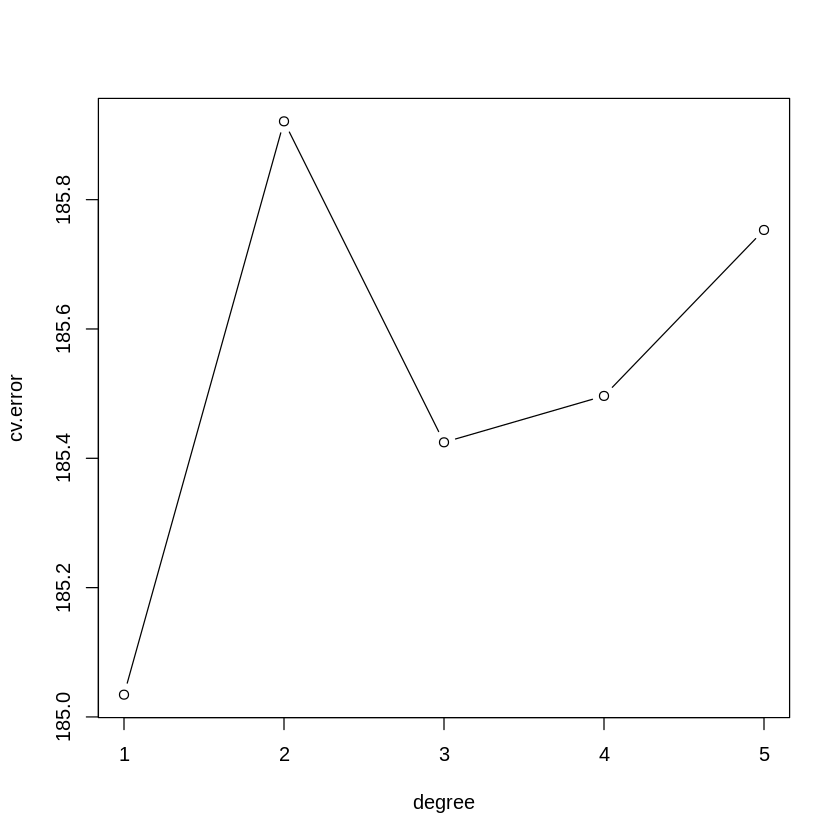

In [ ]:
plot(degree, cv.error, type = "b")

# K cross x1

In [ ]:
K = 10
cv.error.1 <- rep(0, 5)
degree <- 1:5
for (d in degree){
  glm.fit <- glm(Yhpoua~poly(X1td, d), data = df)
  cv.error.1[d] <- cv.glm(df, glm.fit, K = K)$delta[1]
}
cv.error.1

[1] 184.5906 186.3134 185.6033 184.5400 188.1051

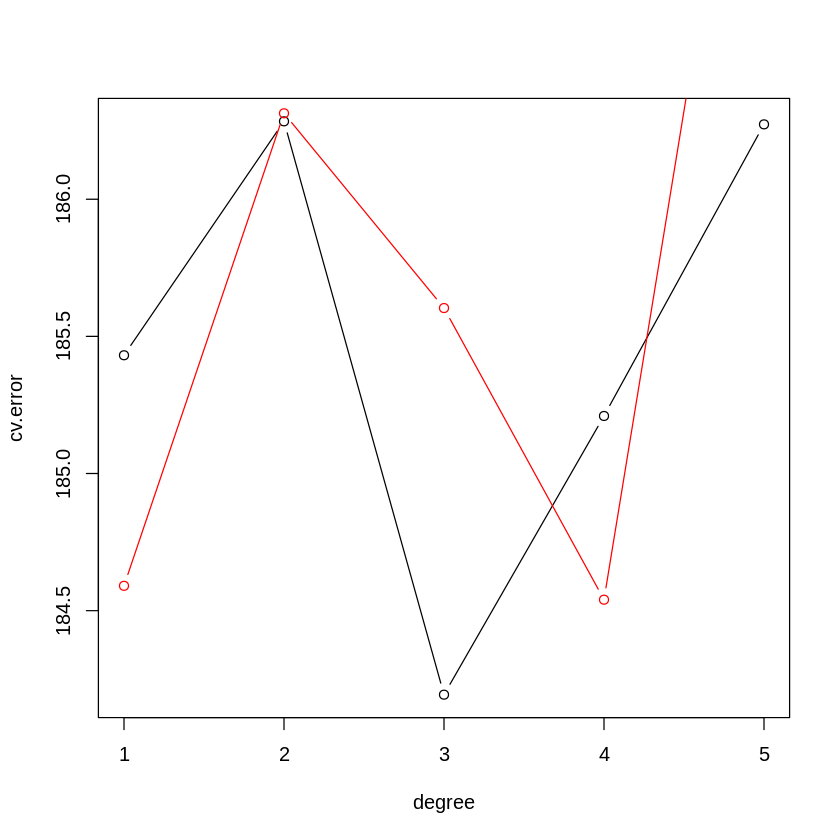

In [ ]:
plot(degree, cv.error,type = "b")
lines(degree, cv.error.1, type = "b", col = "red")

## K cross x2

In [ ]:
K = 10
cv.error.2 <- rep(0, 5)
degree <- 1:5
for (d in degree){
  glm.fit <- glm(Yhpoua~poly(X2ha, d), data = df)
  cv.error.2[d] <- cv.glm(df, glm.fit, K = K)$delta[1]
}
cv.error.2

[1] 178.9091 149.6131 150.4297 150.8350 151.3160

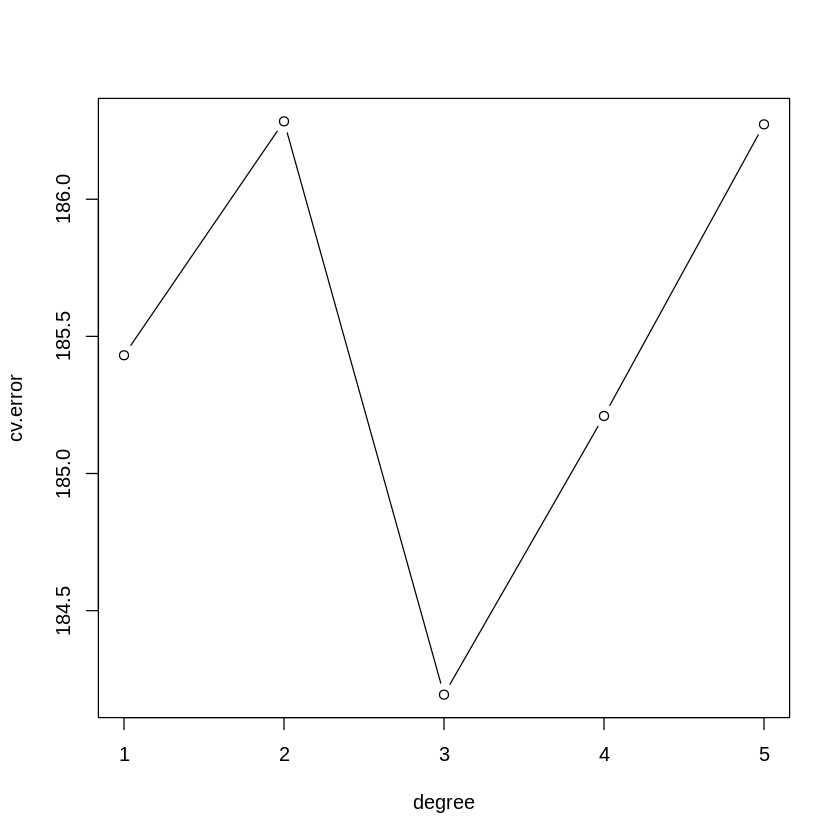

In [ ]:
plot(degree, cv.error, type = "b")
lines(degree, cv.error.2, type = "b", col = "red")

## K cross x3

In [ ]:
K = 10
cv.error.3 <- rep(0, 5)
degree <- 1:5
for (d in degree){
  glm.fit <- glm(Yhpoua~poly(X3dttnms, d), data = df)
  cv.error.3[d] <- cv.glm(df, glm.fit, K = K)$delta[1]
}
cv.error.3

[1] 102.02568  88.36565  83.00624  80.83219  81.97651

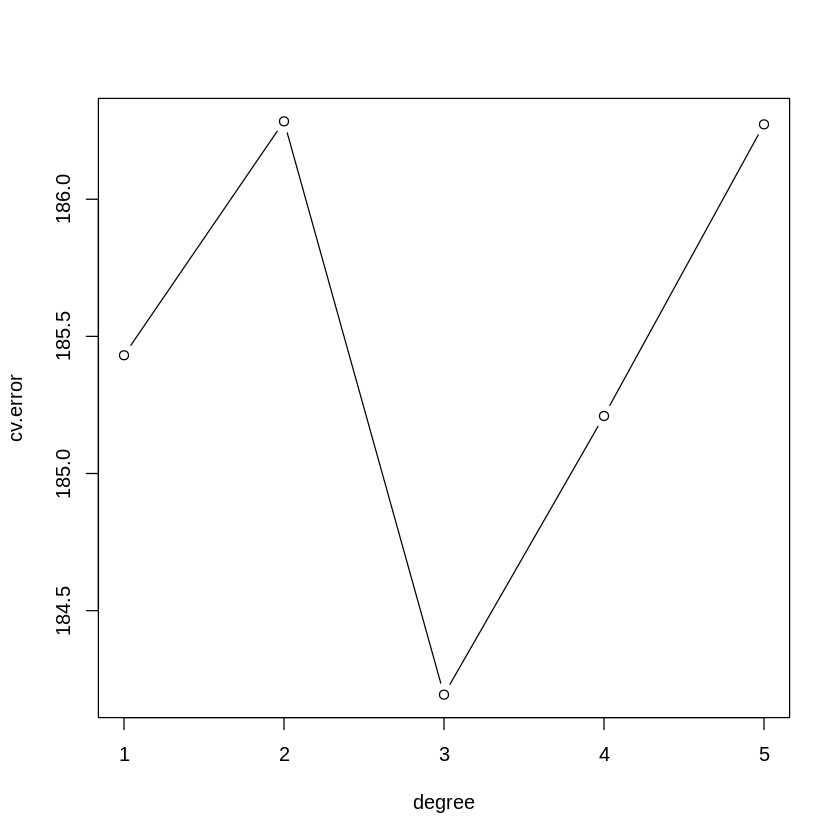

In [ ]:
plot(degree, cv.error, type = "b")
lines(degree, cv.error.3, type = "b", col = "red")

## K cross x4

In [ ]:
K = 10
cv.error.4 <- rep(0, 5)
degree <- 1:5
for (d in degree){
  glm.fit <- glm(Yhpoua~poly(X4nocs, d), data = df)
  cv.error.4[d] <- cv.glm(df, glm.fit, K = K)$delta[1]
}
cv.error.4

[1] 125.5250 125.5960 124.0696 125.7928 124.7689

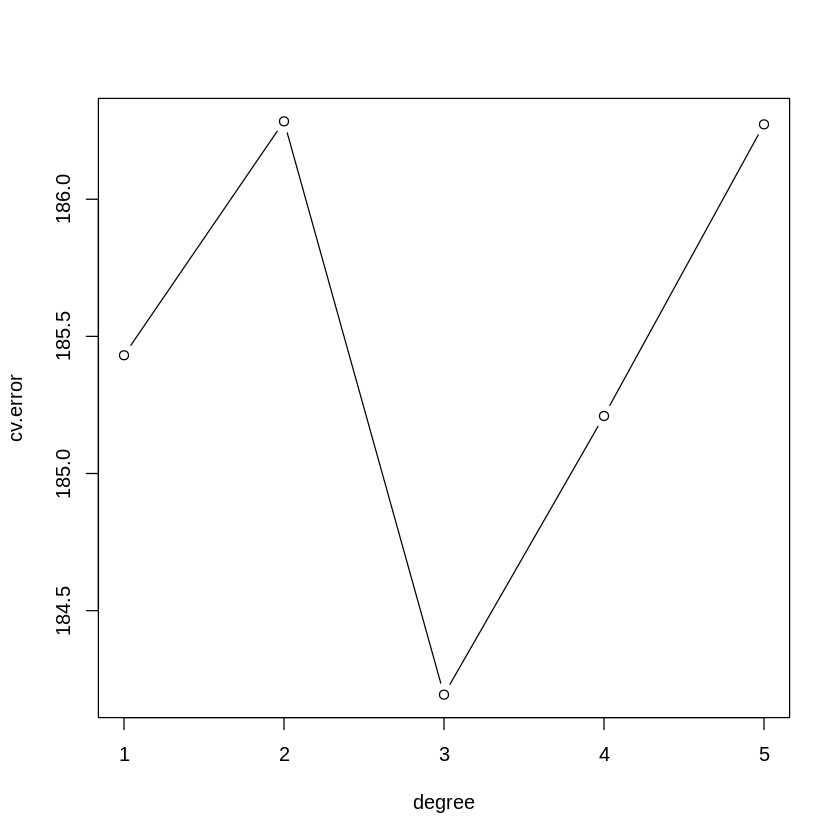

In [ ]:
plot(degree, cv.error, type = "b")
lines(degree, cv.error.4, type = "b", col = "red")

## K cross x5

In [ ]:
K = 10
cv.error.5 <- rep(0, 5)
degree <- 1:5
for (d in degree){
  glm.fit <- glm(Yhpoua~poly(X5lat, d), data = df)
  cv.error.5[d] <- cv.glm(df, glm.fit, K = K)$delta[1]
}
cv.error.5

[1] 130.4484 124.6935 125.2942 113.9647 127.1391

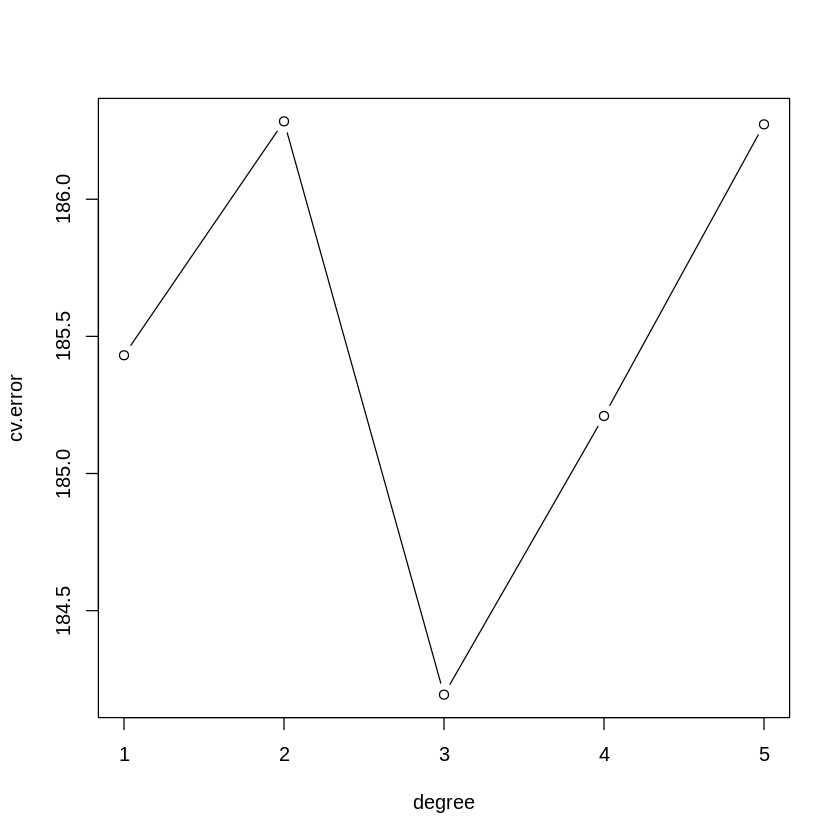

In [ ]:
plot(degree, cv.error,type = "b")
lines(degree, cv.error.5, type = "b", col = "red")
# I'm not sure why after cv.error.1 it stopped showing the red line?

## K cross x6

In [ ]:
K = 10
cv.error.6 <- rep(0, 5)
degree <- 1:5
for (d in degree){
  glm.fit <- glm(Yhpoua~poly(X6long, d), data = df)
  cv.error.6[d] <- cv.glm(df, glm.fit, K = K)$delta[1]
}
cv.error.6

[1] 135.0054 128.8684 110.9406 111.0476 108.9371

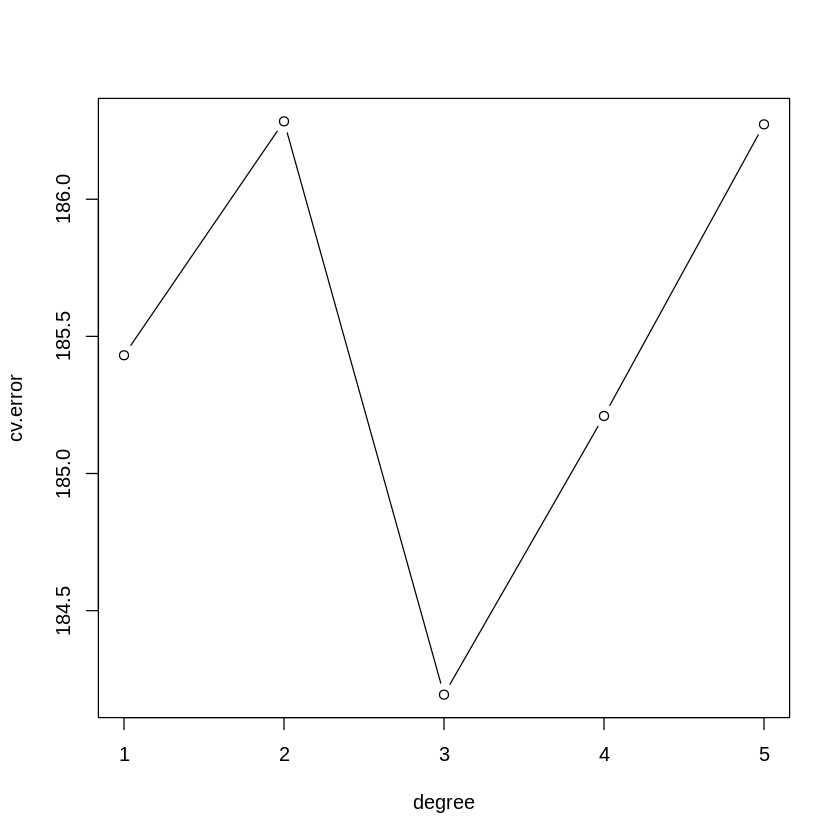

In [ ]:
plot(degree, cv.error,type = "b")
lines(degree, cv.error.6, type = "b", col = "red")


## Bootstrap Val x1

In [ ]:
## Estimating Accuracy of a Linear Model
boot.fn <- function(data, index){
return(coef(lm(Yhpoua~X1td, data=data,subset=index)))
}

In [ ]:
boot.fn(df, 1:414)

(Intercept)         X1td 
-8464.259532     4.223354

In [ ]:
# Setting seed
set.seed(1)
boot.fn(df, sample(414, 414, replace=T))

(Intercept)          X1td 
-15754.385176      7.845665

In [ ]:
boot.out <- boot(df, boot.fn, 1000)

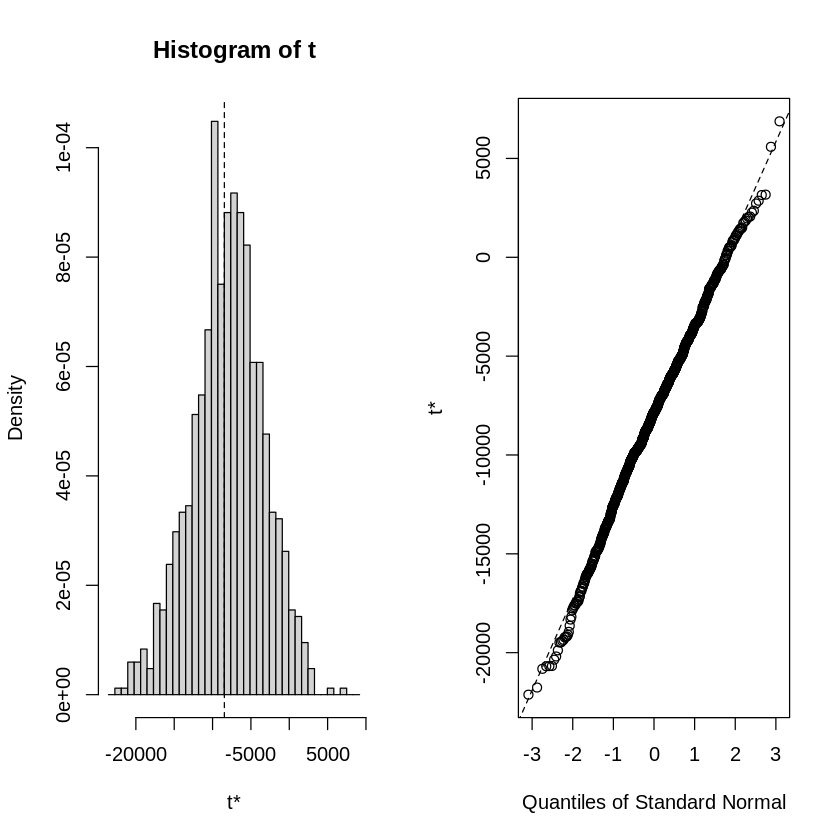

In [ ]:
plot(boot.out)

## Bootstrap val x2

In [ ]:
boot.fn <- function(data, index){
return(coef(lm(Yhpoua~X2ha, data=data,subset=index)))
}
boot.fn(df, 1:414)
set.seed(1)
boot.fn(df, sample(414, 414, replace=T))
boot.out2 <- boot(df, boot.fn, 1000)

(Intercept)        X2ha 
 42.4346970  -0.2514884

(Intercept)        X2ha 
 43.6702552  -0.2071505

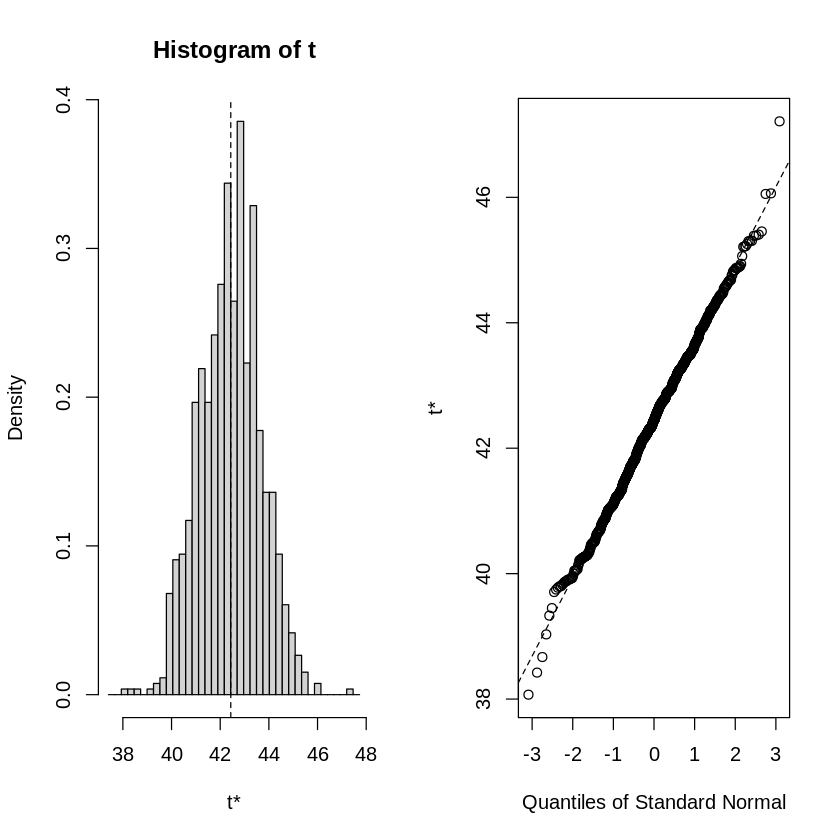

In [ ]:
plot(boot.out2)

## Bootstrap val x3

In [ ]:
boot.fn <- function(data, index){
return(coef(lm(Yhpoua~X3dttnms, data=data,subset=index)))
}
boot.fn(df, 1:414)
set.seed(1)
boot.fn(df, sample(414, 414, replace=T))
boot.out3 <- boot(df, boot.fn, 1000)

(Intercept)     X3dttnms 
45.851427058 -0.007262052

(Intercept)    X3dttnms 
47.53654707 -0.00769632

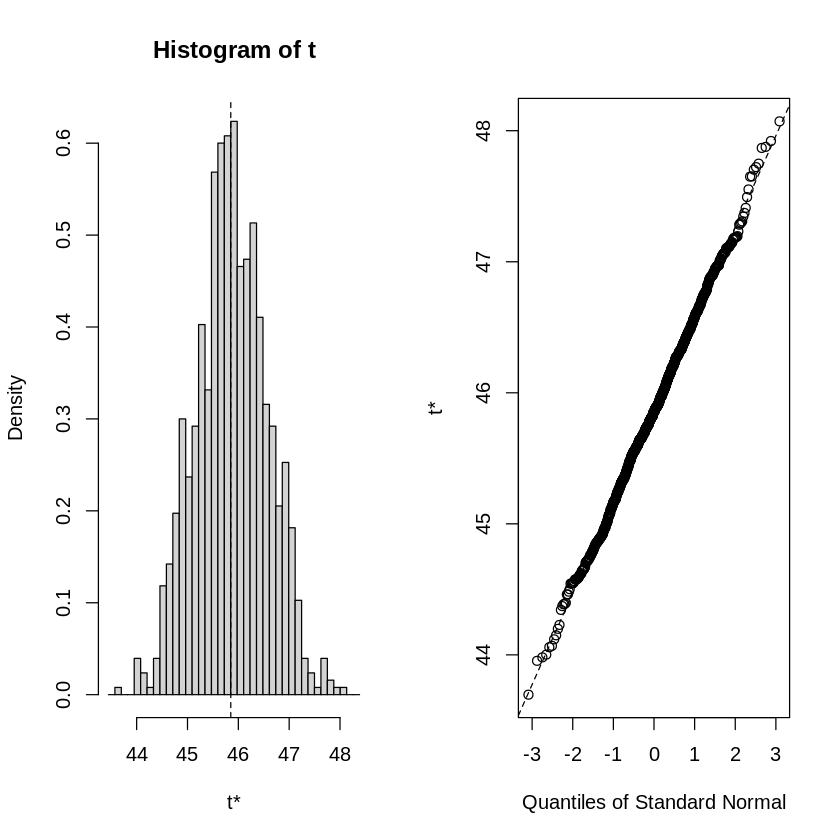

In [ ]:
plot(boot.out3)

## Bootstrap val x4

In [ ]:
boot.fn <- function(data, index){
return(coef(lm(Yhpoua~X4nocs, data=data,subset=index)))
}
boot.fn(df, 1:414)
set.seed(1)
boot.fn(df, sample(414, 414, replace=T))
boot.out4 <- boot(df, boot.fn, 1000)

(Intercept)      X4nocs 
  27.181105    2.637653

(Intercept)      X4nocs 
  30.499966    2.287917

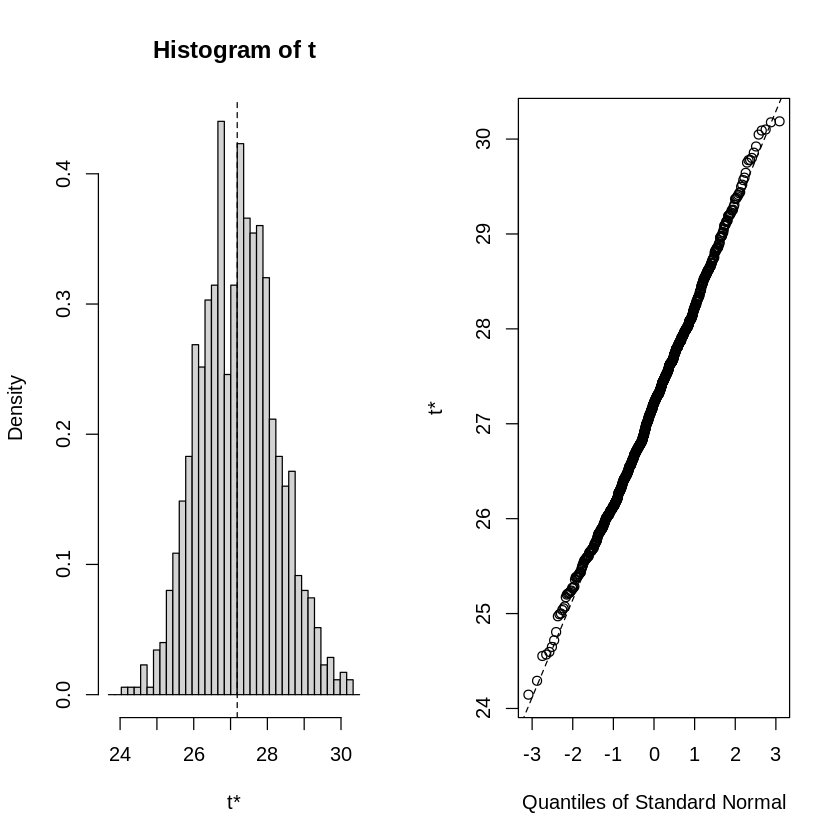

In [ ]:
plot(boot.out4)

## Bootstrap val x5

In [ ]:
boot.fn <- function(data, index){
return(coef(lm(Yhpoua~X5lat, data=data,subset=index)))
}
boot.fn(df, 1:414)
set.seed(1)
boot.fn(df, sample(414, 414, replace=T))
boot.out5 <- boot(df, boot.fn, 1000)

(Intercept)       X5lat 
-14917.6781    598.9683

(Intercept)       X5lat 
-15253.1927    612.4692

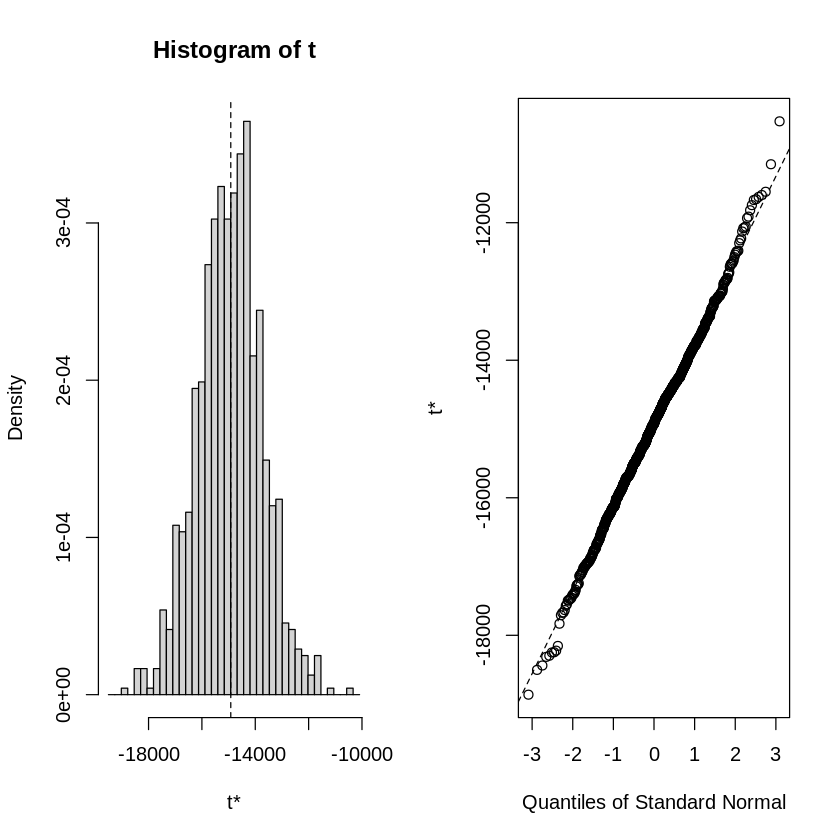

In [ ]:
plot(boot.out5)

## Bootstrap val x6

In [ ]:
boot.fn <- function(data, index){
return(coef(lm(Yhpoua~X6long, data=data,subset=index)))
}
boot.fn(df, 1:414)
set.seed(1)
boot.fn(df, sample(414, 414, replace=T))
boot.out6 <- boot(df, boot.fn, 1000)

(Intercept)      X6long 
-56345.5686    463.9347

(Intercept)      X6long 
-61968.4972    510.2152

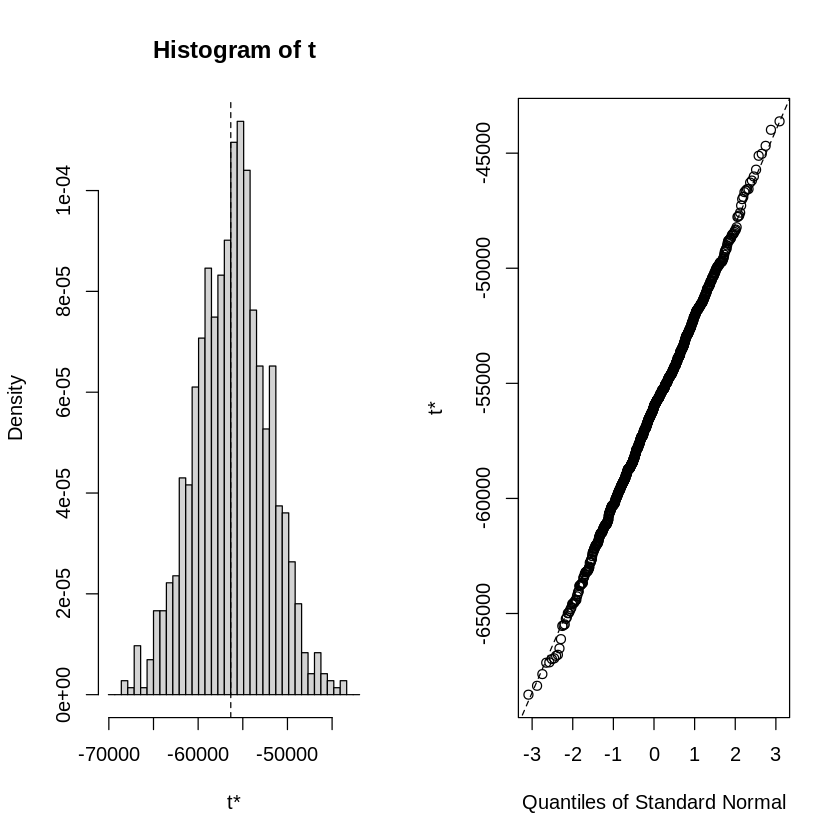

In [ ]:
plot(boot.out6)